# Homework 6: Stroop Test Analysis with Pandas

Perform the same analysis as in Homework 3, on the same data.  While this is the same dataset, and the same analysis sequence, the different data organization (a data frame) will have a different "feel" to it than before.  As you work through the notebook, notice the differences and similarities in your code as when you were just working with 1D Numpy arrays.

In [1]:
from os import path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

While exploring pandas, you may have |also noticed pandas.np.  Yep, it's NumPy! 

In [2]:
print(pd.np.__name__)

numpy


 Don't worry about whether you use the numpy that pandas imports or that you import--they are exactly the same, and numpy will only actually be imported once.  This is a general rule for all python packages.

In [3]:
pd.np is np

True

# Set Paths
The Data for this homework assignment is actually the same as the data from last week, except we'll be working directly from the original CSV File, which contains all of the data.  CSV Files are text files that store data in rows and columns.

The Data File: 'Homework Sample Data/Homework 6'/'StroopData.csv'

In [266]:
data_dir = path.join('Homework Sample Data', 'Homework 6')
filename =  path.join(data_dir, 'StroopData.csv')
filename

'Homework Sample Data/Homework 6/StroopData.csv'

# Load the CSV File into an Pandas DataFrame

This is a lot of data! To display just the first 5 rows of the data (useful in these notebooks), use the **head()** method on the dataframe.  Note: The **Condition** column says whether the word displayed matches (Congruent) or doesn't match (Incongruent) its color.

In [5]:
df = pd.read_csv(filename)
df.head()

,ClassID,UserID,NumTrial,Condition,ColorORWord,WordDisplayed,ColorOfStimulus,ColorOfResponse,ReactionTime,Gender,Age
0,6110,156772,1,ConW,C,YELLOW,Y,Y,1389.0,M,26
1,6110,156772,2,ConW,C,GREEN,G,G,2043.0,M,26
2,6110,156772,3,ConW,C,RED,R,R,1389.0,M,26
3,6110,156772,4,ConW,C,YELLOW,Y,Y,1092.0,M,26
4,6110,156772,5,ConW,C,GREEN,G,G,1310.0,M,26


## How Many Trials were there in total across all subjects?

In [6]:
len(df)

2880

## How Many Unique Subject IDs were there in this study?

In [7]:
len(pd.unique(df['UserID']))

32

New Approach: If you change a column's type to **Category**, python will treat numbers the same way it treats strings!  (Note: this isn't completely implemented by Pandas yet, but is a standard feature in dataframes across languages and statistical software) 

In [8]:
df['UserIDCat'] = df['UserID'].astype('category')
df['UserIDCat'].describe()

count       2880
unique        32
top       156885
freq          90
Name: UserIDCat, dtype: int64

## What is the mean response time, across all subjects and conditions?

In [9]:
df['ReactionTime'].mean()

2136.1878472222224

## Plot a histogram of the response times
(Don't forget to make sure that **%matplotlib inline** has been run already in this notebook, or the plot may not show up!)

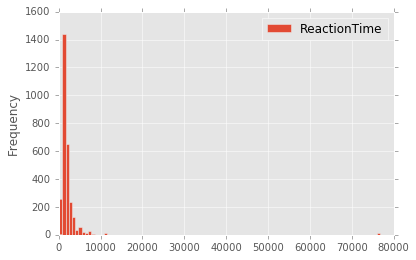

In [10]:
df.plot.hist(y='ReactionTime', bins=100)

## Remove Outliers
Make a "Good Trials" column, with False values for response times greater than 5000 msecs.  There is no way they should have taken that long!  Then, plot the RT histogram with only the good columns!

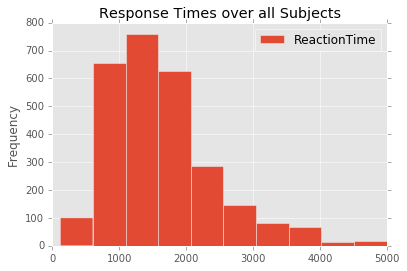

In [11]:
df['GoodTrials'] = df['ReactionTime'] < 5000
df[df['GoodTrials']].plot.hist(y='ReactionTime', title='Response Times over all Subjects')

## Transform the Response Times

You should see that the responses are not normally distributed (if you can't see this, try using a higher number of **bins** in your histogram function).  While this isn't really a problem, it's very convenient when you have normally-distributed data.  Let's try transforming it to get something a bit nicer for statistical analysis...

  - Make a new column with the **log** of the response times.  
  - Plot a new histogram!

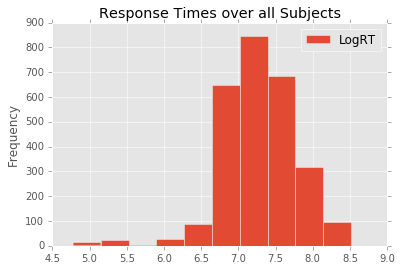

In [12]:
df['LogRT'] = np.log(df['ReactionTime'])
df[df['GoodTrials']].plot.hist(y='LogRT', title='Response Times over all Subjects')

## Reject Bad Data

Now, that's a little nicer!  But wait... there's are some trials that seem to be on the low end, as well-- those with **log response times less than 5.7**.  After much consideration and deliberation with my supervisor, I've decided to remove those trials from my whole analysis, too! 

Make those too-slow trials also "False" in the "Good Trials" column, and plot the new, cleaner histogram!

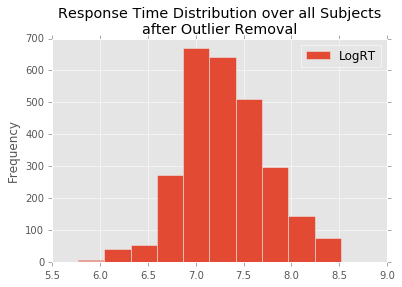

In [13]:
df['GoodTrials'] &= df['LogRT'] > 5.7
df[df['GoodTrials']].plot.hist(y='LogRT', title='Response Time Distribution over all Subjects\nafter Outlier Removal')

## Overall, what was the accuracy of the responses? 
  - How many trials in total were correct (stimcolor matched respcolor), 
  - how many were incorrect, and 
  - what percent accuracy was there, overall?

In [14]:
df['Correct'] = df['ColorOfStimulus'] == df['ColorOfResponse']

df = df[df['GoodTrials']]  # Analyze only the kept trials

### Correct

In [15]:
df['Correct'].sum()

2629

### Incorrect

In [16]:
(df['Correct'] == False).sum()

81

### Accuracy

In [17]:
df['Correct'].mean()

0.97011070110701103

Rather than using section headers for every single result, it's probably better to use formatted strings to report your results in a nicer format.

In [18]:
accuracy = df['Correct'].mean()
'Accuracy: {:.2%}'.format(accuracy)

'Accuracy: 97.01%'

## Matched vs Unmatched Colors: 

  - What was the mean log response time for Congruent trials (the stimulus word and color matched each other)?  
  - What was the mean log response time for Incongruent trials (when they did not match)?

In [19]:
conds = df.groupby('Condition')
conds.LogRT.mean()

Condition
ConW    7.043540
IncW    7.594469
Name: LogRT, dtype: float64

## Make a Bar Graph of Log Response Time
The bar graph should show Mean Log Response Times for the Congruent and Incongruent conditions, with Standard-Deviation Error Bars.  Put text labels on the x access showing which bars go with which condition.

For help and an example, take a look at http://matplotlib.org/examples/api/barchart_demo.html

Condition
ConW    0.335484
IncW    0.354580
Name: LogRT, dtype: float64

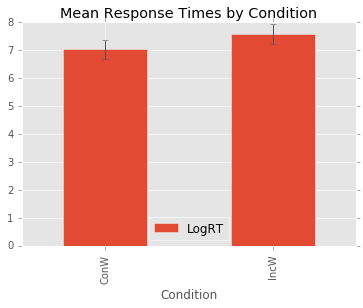

In [20]:
cond_rt = conds.LogRT
cond_rt.mean().plot.bar(legend=True, yerr=cond_rt.std(), 
                        title='Mean Response Times by Condition')
cond_rt.std()

# Make a Bar Graph of Response Time

The logged data doesn't make a very good impression of just how big an effect this is, sadly.  Let's make the same bar graph, but this time with the original response times, in milliseconds.

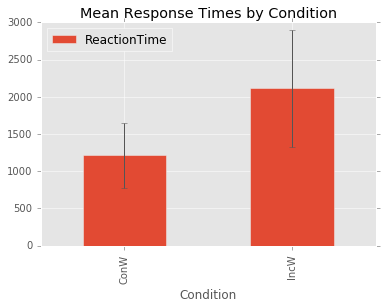

In [21]:
cond_rt = conds.ReactionTime
cond_rt.mean().plot.bar(legend=True, yerr=cond_rt.std(), 
                        title='Mean Response Times by Condition')

# Change in Performance over Time

In experiments like this, we assume that each trial is independent of each other.  Often, this isn't the case, and not taking that into account can sometimes lead to some wrong conclusions.  Let's see what we can find...

### How did reaction time change over the course of a session? 

Were earlier trials faster or slower than later trials in a session, overall?  Make a scatter plot of the response times over the trial numbers!

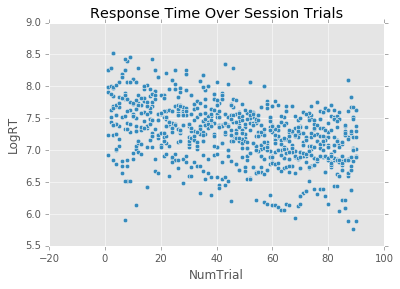

In [25]:
df.plot.scatter(x='NumTrial', y='LogRT', title='Response Time Over Session Trials')

### What about between each subject?  Do all subjects show this difference in response time between the Congruent and Incogruent conditions, or is this just coming from a few subjects?

We could use **Masking** and **For-Loops** to split up the data into each user's responses, then reassemble the processed data into a new array or dataframe. This would look very similar, practice, to what we've done up until now (see Homework 2 Answers for example of this approach).  

However, this means creating a lot of new variables and essentially breaking apart our nicely-organized data.  Instead, I'll demonstrate a different approach, called **Split-Apply-Combine**.  There are lots of ways to do this; here, I'll demonstrate a simple pipeline that will perform it in two steps:
   1. Use **groupby()** to split the data into the groups you're interested in.
   2. Use **agg(functions)** or aggregation shortcut functions like **mean()** or **std()** to compute values from each group and produce a new Series or DataFrame from them.
      
For more information on different approaches for **Split-Apply-Combine** in Pandas: see https://pandas-docs.github.io/pandas-docs-travis/groupby.html

#### Split

In [231]:
subjrt = df.groupby(('UserID', 'Condition')).LogRT
list(subjrt.groups.keys())[:6]

[(156868, 'IncW'),
 (156857, 'IncW'),
 (156874, 'ConW'),
 (156863, 'IncW'),
 (156869, 'ConW'),
 (156878, 'ConW')]

#### Apply / Combine

In [232]:
subjrt = subjrt.agg(np.mean)
subjrt.head(6)

UserID  Condition
156772  ConW         6.971163
        IncW         7.351251
156839  ConW         6.455973
        IncW         6.759741
156856  ConW         6.871654
        IncW         7.014764
Name: LogRT, dtype: float64

In [233]:
subjrt = pd.DataFrame(subjrt)
subjrt.head()

LogRT
UserID Condition          
156772 ConW       6.971163
       IncW       7.351251
156839 ConW       6.455973
       IncW       6.759741
156856 ConW       6.871654

#### Now we have many-dimensional data: UserID x Condition x MeanLogRT. However, DataFrames only let you view data in 2D.  Use stack(), unstack(), and pivot() to transpose multidimensional data.  

In [236]:
subjrt.unstack().head()

LogRT          
Condition      ConW      IncW
UserID                       
156772     6.971163  7.351251
156839     6.455973  6.759741
156856     6.871654  7.014764
156857     6.897377  7.475482
156858     6.897377  7.475482

### All at Once: What does Split-Apply-Combine look like in practice?

In [238]:
subjRTs = df.groupby(('UserID', 'Condition')).LogRT.agg({'Mean': np.mean, 'STD': np.std}).unstack()
subjRTs.head(4)

STD                Mean          
Condition      ConW      IncW      ConW      IncW
UserID                                           
156772     0.268299  0.144569  6.971163  7.351251
156839     0.498677  0.592312  6.455973  6.759741
156856     0.305584  0.314003  6.871654  7.014764
156857     0.228352  0.380566  6.897377  7.475482

Plot a histogram of the difference in mean log reaction times between conditions for each subject!

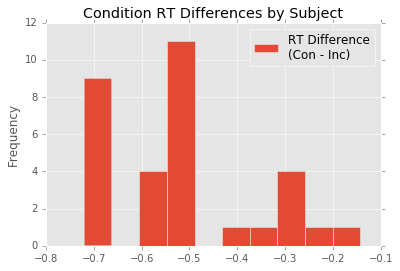

In [261]:
(subjRTs.Mean.ConW - subjRTs.Mean.IncW).plot.hist(label='RT Difference\n(Con - Inc)', 
                                                  legend=True,
                                                 title='Condition RT Differences by Subject')

What do you think, should anyone be rejected?  

## Participant Response Speed vs. Size of Stroop Effect

Make a scatter plot showing the relationship between how quickly subjects responded for congruent and incongruent stimuli!

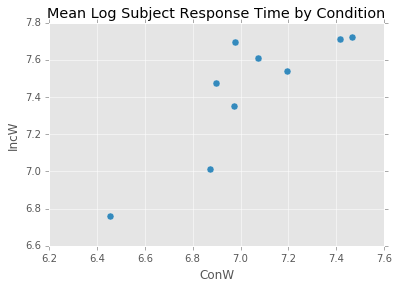

In [265]:
fig, ax = plt.subplots()
subjRTs['Mean'].plot.scatter(x='ConW', y='IncW', s=50, ax=ax,
                      title='Mean Log Subject Response Time by Condition')

## Save Figure to File

Save the figure using **fig.savefig()** to your data directory as a png file!  Great job!

In [268]:
fig.savefig(path.join(data_dir, 'myfig.svg'))